In [2]:
#importing packages
import os
import h5py
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation, SpatialDropout2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [3]:
#training data directory and parameteres
trainDataGen = ImageDataGenerator(
                    rotation_range = 5,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    rescale = 1.0/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,		
                    horizontal_flip = False,
                    fill_mode = 'nearest',
                )

testDataGen = ImageDataGenerator(rescale=1.0/255,)


train_gen = trainDataGen.flow_from_directory(
                    "data/Train",
                    target_size=(32, 32),
                    color_mode="grayscale",
                    class_mode="categorical",
                    batch_size=32
                    )



Found 136400 images belonging to 62 classes.


In [4]:
#validation data directory and parameteres
val_gen = testDataGen.flow_from_directory(
                    "data/Test",
                    target_size=(32, 32),
                    color_mode="grayscale",
                    class_mode="categorical",
                    batch_size=32
                    )


Found 18600 images belonging to 62 classes.


In [5]:
#Adding CNN Layers
model = Sequential()

#Layer1 -------- 32 ----------------------------------------------------------
model.add(Convolution2D(filters = 32,kernel_size = (3,3),padding='same', activation = "relu",
            input_shape = (32,32,1)))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer2 ---- 32 -------------------------------------------------------------
model.add(Convolution2D(filters = 32,kernel_size = (3,3), activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#strides=(2, 2),padding="same")

#Layers 3 ------- 64 -----------------------------------------------------------	
model.add(Convolution2D(filters = 64,kernel_size = (3,3),padding='same', activation = "relu"))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer 4 --------- 64 --------------------------------------------------
model.add(Convolution2D(filters = 64,kernel_size = (3,3),activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer 5 ---------- 128 -----------------------------------------------
model.add(Convolution2D(filters = 128,kernel_size = (3,3),padding='same',activation = "relu"))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer 6 ---------- 128 ------------------------------------------------
model.add(Convolution2D(filters = 128,kernel_size = (3,3),activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening Data
model.add(Flatten())

#Adding hidden layers

#Hidden layer - 1
model.add(Dense(786,activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(100,activation = "relu"))

model.add(Dense(100,activation = "relu"))

model.add(Dense(100,activation = "relu"))

#Output Layer
model.add(Dense(62,activation = "softmax"))

In [6]:
# Compile the model

#opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer = opt,
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [7]:
#if no change in validation loss - learning rate will be decreased
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [8]:
#fitting the model
eng_cnn = model.fit(
        train_gen,
        epochs = 30,
        steps_per_epoch = 4263,
        validation_data = val_gen,
        validation_steps = 582
        )

Epoch 1/30
4263/4263 [==============================] - 265s 62ms/step - loss: 1.8474 - accuracy: 0.4320 - val_loss: 0.9591 - val_accuracy: 0.6289
Epoch 2/30
4263/4263 [==============================] - 125s 29ms/step - loss: 1.0639 - accuracy: 0.6177 - val_loss: 0.7836 - val_accuracy: 0.6853
Epoch 3/30
4263/4263 [==============================] - 127s 30ms/step - loss: 0.9579 - accuracy: 0.6507 - val_loss: 0.8128 - val_accuracy: 0.6814
Epoch 4/30
4263/4263 [==============================] - 129s 30ms/step - loss: 0.9077 - accuracy: 0.6643 - val_loss: 0.7499 - val_accuracy: 0.6965
Epoch 5/30
4263/4263 [==============================] - 129s 30ms/step - loss: 0.8732 - accuracy: 0.6770 - val_loss: 0.7138 - val_accuracy: 0.7180
Epoch 6/30
4263/4263 [==============================] - 148s 35ms/step - loss: 0.8497 - accuracy: 0.6828 - val_loss: 0.6993 - val_accuracy: 0.7179
Epoch 7/30
4263/4263 [==============================] - 142s 33ms/step - loss: 0.8277 - accuracy: 0.6905 - val_loss: 0

In [9]:
#saving the model
model.save("EnglishModel-72.h5")

In [10]:
#plotting graphs
%matplotlib inline
accu=eng_cnn.history['accuracy']
val_acc=eng_cnn.history['val_accuracy']
loss=eng_cnn.history['loss']
val_loss=eng_cnn.history['val_loss']

epochs=range(len(accu)) #No. of epochs



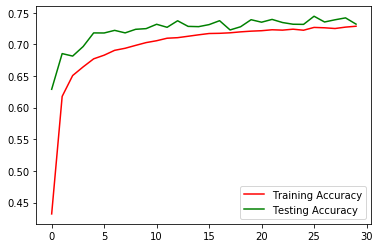

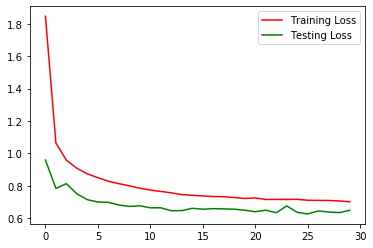

In [12]:
import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')

plt.plot(epochs,val_acc,'g',label='Testing Accuracy')

plt.savefig('training_acuuracy_eng.png')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')

plt.plot(epochs,val_loss,'g',label='Testing Loss')

plt.savefig('training_loss_eng.png')
plt.legend()
plt.show()
